In [21]:
import matplotlib as mpl
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from retrospective_analysis.metrics import max_error, mean_difference
from retrospective_analysis.data_loading import load_dataframe, moving_average, add_baselines
from retrospective_analysis.evaluate_scenarios import compute_metrics, compute_metrics_all_scenarios, evaluate_all_scenarios

In [22]:
# to change with path suited for you 
results_path = 'results/'
images_path = 'images/'

# divide by 100 to express as % of normalization
new_hosp_normalization = 4200/100 
icu_normalization = 7000/100 

metrics = {"MAE": mean_absolute_error, "ME": mean_difference,  
           "Max Error": max_error}

scenario_endpoints = ["ICU", "ICU", "New hosp.", "New hosp.", "New hosp.",
                      "New hosp.", "New hosp.", "New hosp.",
                      "ICU", "ICU", "New hosp.", "New hosp.", "ICU",  "New hosp.", "New hosp.","ICU"]

endpoints_normalizations = {"ICU": 7000/100, 
                            "New hosp.": 4200/100}

data_location = {"2020/04/28 ICU": "data_preparation/_site/output_data/min_med_max_and_error/ICU_error/2020_04_28_ICU_error.csv",
        "2020/10/30 ICU": "data_preparation/_site/output_data/min_med_max_and_error/ICU_error/2020_10_30_ICU_error.csv",
        "2021/01/16": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_01_16_new_hosp_error.csv",
        "2021/02/02": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_02_02_new_hosp_error.csv",
        "2021/02/08": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_02_08_new_hosp_error.csv",
        "2021/02/23": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_02_23_new_hosp_error.csv",
        "2021/04/26": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_04_26_new_hosp_error.csv",
        "2021/05/21": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_05_21_new_hosp_error.csv",
        "2021/05/21 ICU": "data_preparation/_site/output_data/min_med_max_and_error/ICU_error/2021_05_21_ICU_error.csv",
        "2021/07/26 ICU": "data_preparation/_site/output_data/min_med_max_and_error/ICU_error/2021_07_26_ICU_error.csv",
        "2021/07/26": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_07_26_new_hosp_error.csv",
        "2021/08/05": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_08_05_new_hosp_error.csv",
        "2021/08/05 ICU": "data_preparation/_site/output_data/min_med_max_and_error/ICU_error/2021_08_05_ICU_error.csv",
        "2021/10/04": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_10_04_new_hosp_error.csv",
        "2022/01/07": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2022_01_07_new_hosp_error.csv",
        "2022/01/07 ICU": "data_preparation/_site/output_data/min_med_max_and_error/ICU_error/2022_01_07_ICU_error.csv"}

normalizations = {"2020/04/28 ICU": icu_normalization,
        "2020/10/30 ICU": icu_normalization,
        "2021/01/16": new_hosp_normalization,
        "2021/02/02": new_hosp_normalization,
        "2021/02/08": new_hosp_normalization,
        "2021/02/23": new_hosp_normalization,
        "2021/04/26": new_hosp_normalization,
        "2021/05/21": new_hosp_normalization,
        "2021/05/21 ICU": icu_normalization,
        "2021/07/26 ICU": icu_normalization,
        "2021/07/26": new_hosp_normalization,
        "2021/08/05": new_hosp_normalization,
        "2021/08/05 ICU": icu_normalization,
        "2021/10/04": new_hosp_normalization,
        "2022/01/07": new_hosp_normalization,
        "2022/01/07 ICU": icu_normalization}

endpoints_normalizations = {"ICU": 7000/100, 
                            "New hosp.": 4200/100}


In [23]:
# Set matplotlib style 
mpl.use("pgf")
mpl.rcParams.update({
    'font.family': 'serif',
    'axes.titlesize' : 30,
    'axes.labelsize' : 30,
    'legend.fontsize' : 30,
    'pgf.rcfonts': False,
    'figure.dpi': 300.0,
})

mpl.rcParams['axes.unicode_minus'] = False
sns.set(font_scale=1.5, style="white", 
        rc={
            'font.family': 'sans-serif',
            'axes.titlesize' : 30,
            'axes.labelsize' : 30,
            'legend.fontsize' : 30,
            'xtick.labelsize' : 30,
            'ytick.labelsize' : 30,
            'xtick.bottom': True,
            'ytick.left': True,
            'figure.dpi': 300.0,
})
%matplotlib inline

In [24]:
len(scenario_endpoints)

16

In [25]:
df_low_scenario = compute_metrics_all_scenarios(data_location, metrics=metrics, normalizations=normalizations, scenario_name = "min")
df_low_scenario["endpoints"] = scenario_endpoints
df_low_scenario["MAE (beds)"] = df_low_scenario["MAE"].values*np.array([endpoints_normalizations[x] for x in scenario_endpoints])
df_low_scenario["Max error (beds)"] = df_low_scenario['Max Error'].values*np.array([endpoints_normalizations[x] for x in scenario_endpoints])

with open(results_path + 'low_scenario.csv', 'w', encoding = 'utf-8-sig') as f:
    df_low_scenario.to_csv(f)

print(df_low_scenario.to_latex(
    formatters={"name": str.upper},
    float_format="{:.1f}".format)) 

\begin{tabular}{lrrrrlrr}
\toprule
{} &  MAE &    ME &  Max Error &  MAPE &  endpoints &  MAE (beds) &  Max error (beds) \\
\midrule
Scenario: 2020/04/28 ICU &  1.4 &  -0.6 &        2.3 &  17.8 &        ICU &        98.0 &             161.0 \\
Scenario: 2020/10/30 ICU &  8.0 &   0.6 &       17.8 &  15.2 &        ICU &       560.0 &            1246.0 \\
Scenario: 2021/01/16     &  5.6 &   2.1 &       14.5 &  18.1 &  New hosp. &       235.2 &             609.0 \\
Scenario: 2021/02/02     &  7.2 &   7.2 &       16.6 &  24.1 &  New hosp. &       302.4 &             697.2 \\
Scenario: 2021/02/08     & 10.4 &  10.4 &       19.0 &  34.6 &  New hosp. &       436.8 &             798.0 \\
Scenario: 2021/02/23     & 12.5 & -12.5 &       18.2 &  40.1 &  New hosp. &       525.0 &             764.4 \\
Scenario: 2021/04/26     &  5.3 &   5.3 &        6.8 &  52.9 &  New hosp. &       222.6 &             285.6 \\
Scenario: 2021/05/21     &  2.9 &  -2.9 &        3.5 &  43.0 &  New hosp. &       121.8 & 

/var/folders/nl/hpnwxlsd6xd8nq2vv1sr5pl80000gn/T/ipykernel_17630/604071543.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_low_scenario.to_latex(


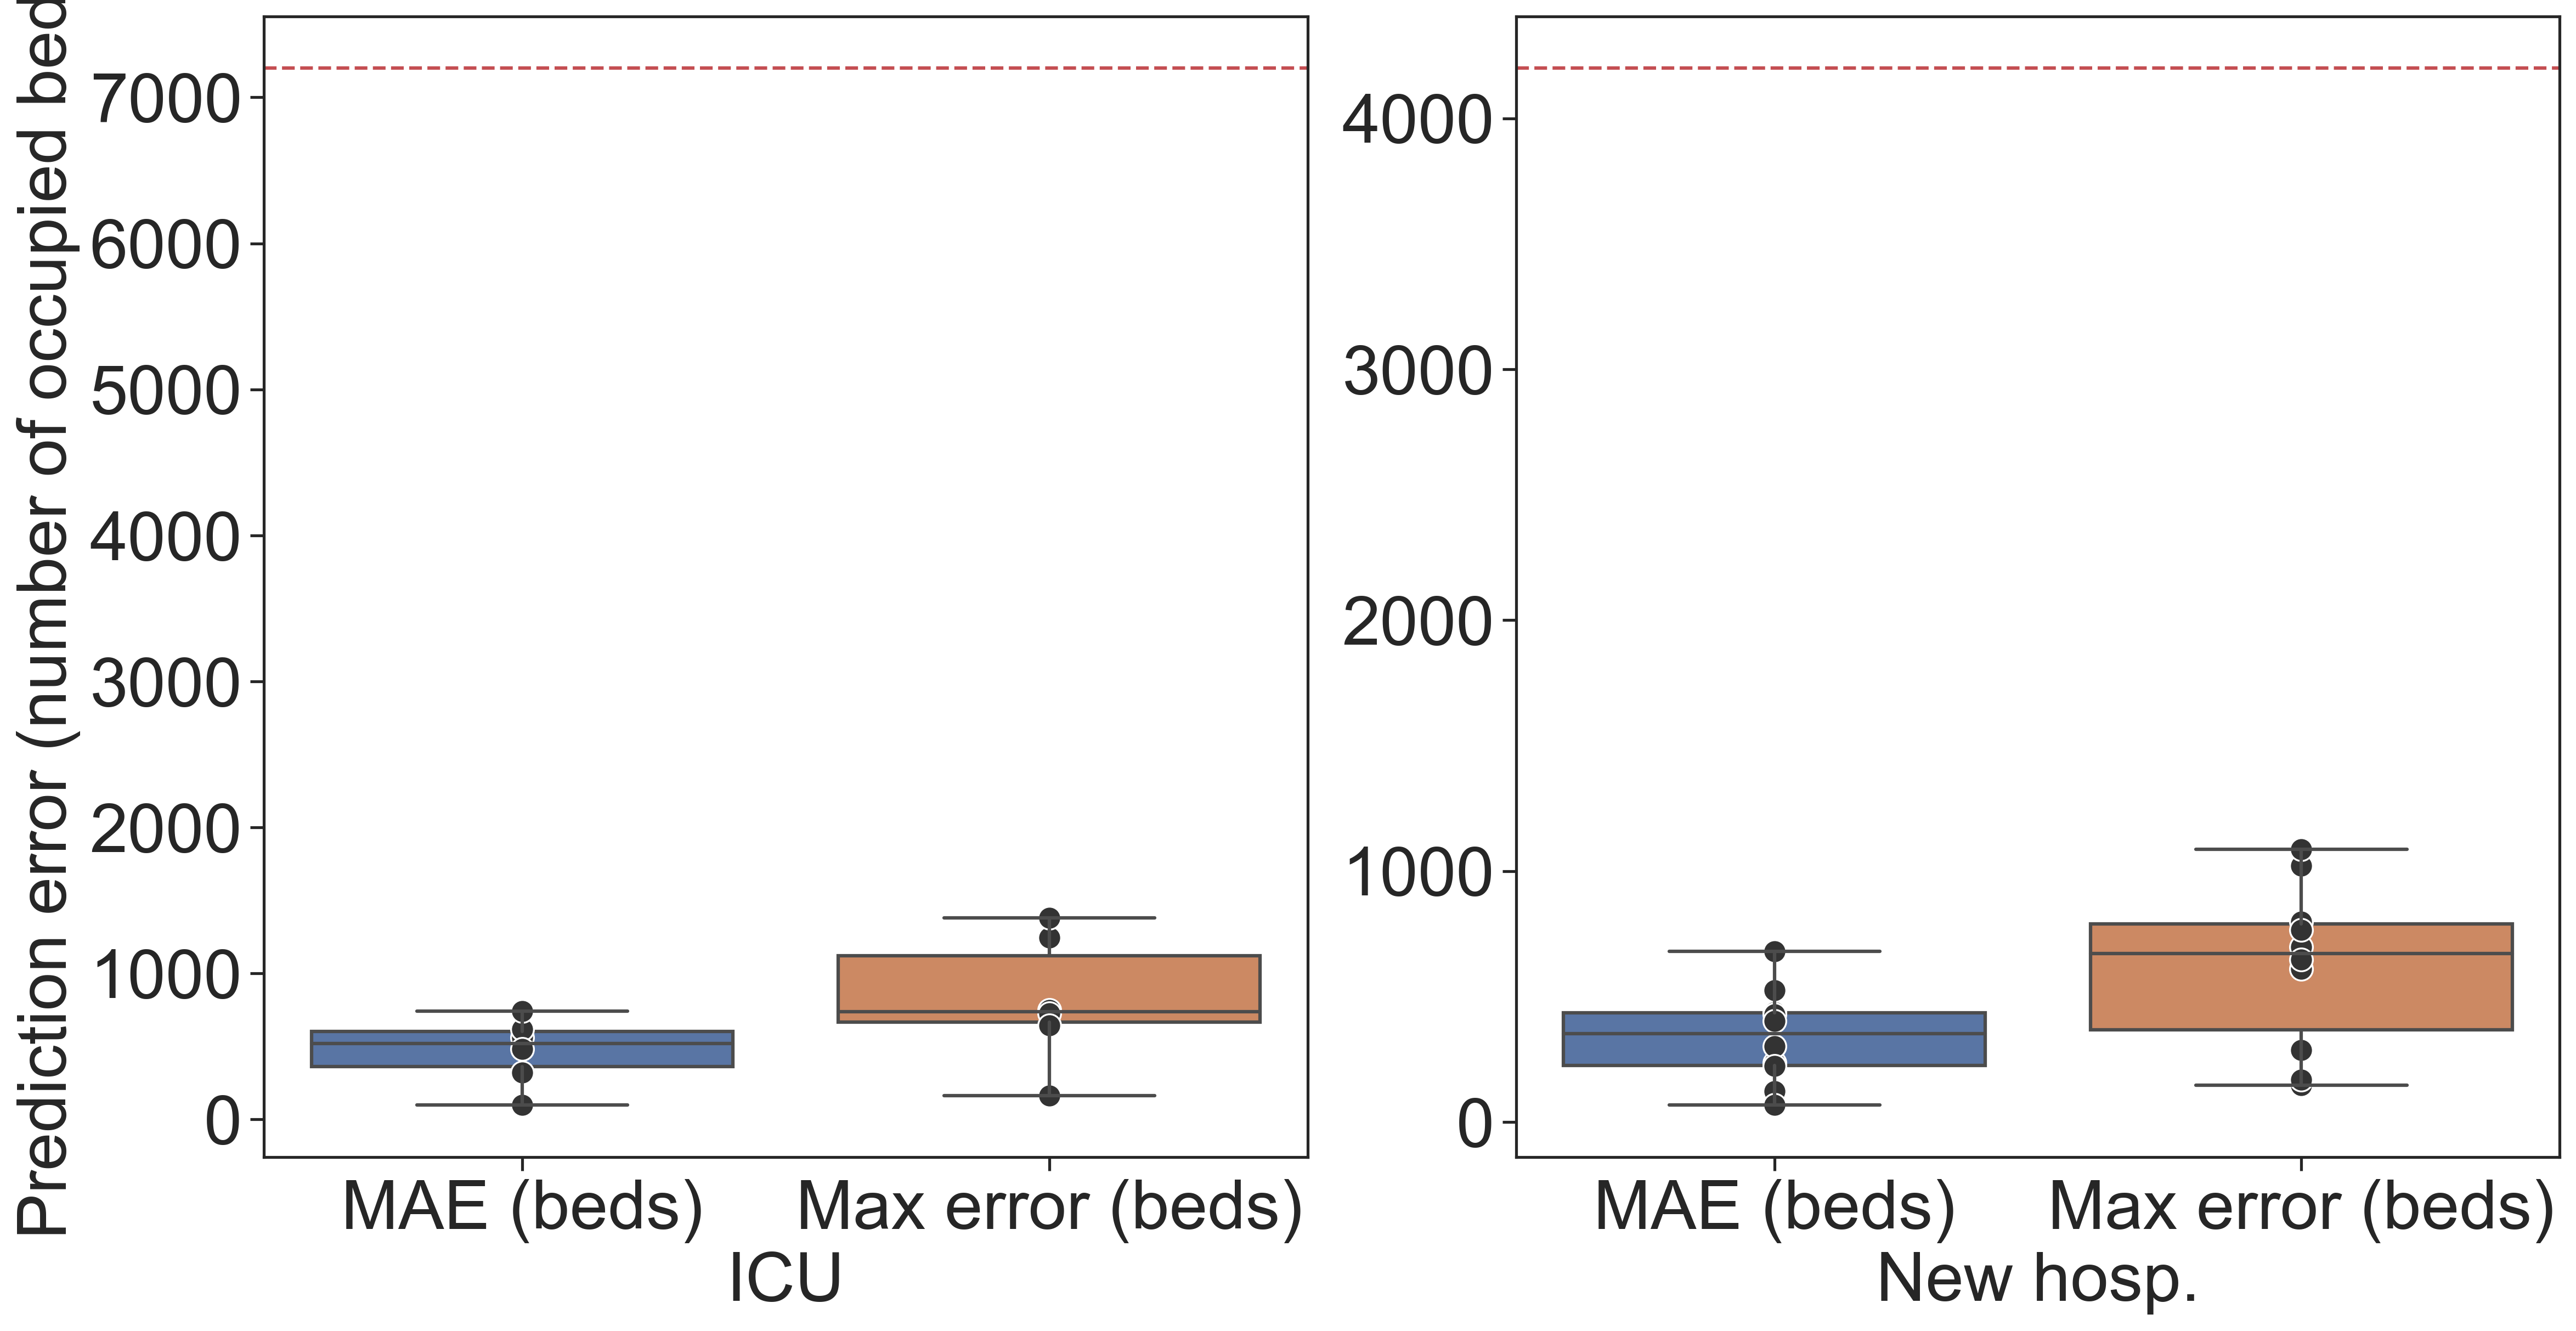

In [26]:
fig, axes = plt.subplots(figsize=(18, 9), ncols=2, nrows=1)

# x2 avec mean + x2 avec mae + mape
display_df = df_low_scenario.melt(id_vars='endpoints', value_vars=['MAE (beds)', 'Max error (beds)'])

h1 = sns.boxplot(data=display_df[display_df.endpoints=='ICU'], y='value', x='variable', ax=axes[0])
sns.scatterplot(data=display_df[display_df.endpoints=='ICU'], y='value', x='variable', ax=axes[0], s=100, color=".2")

# = sns.boxplot(data=df_median_scenario, y="Max error (beds)", ax=ax, x='endpoints')
axes[0].set_xlabel("ICU")
axes[0].set_ylabel("Prediction error (number of occupied beds)")
axes[0].axhline(7200, c='r', linestyle='--')

h2 = sns.boxplot(data=display_df[display_df.endpoints!='ICU'], y='value', x='variable', ax=axes[1])
sns.scatterplot(data=display_df[display_df.endpoints!='ICU'], y='value', x='variable', ax=axes[1], s=100, color=".2")
# = sns.boxplot(data=df_median_scenario, y="Max error (beds)", ax=ax, x='endpoints')
axes[1].set_xlabel("New hosp.")
axes[1].axhline(4200, c='r', linestyle='--')

plt.ylabel("")
    
fig_path = images_path + '/error_beds_low.pdf'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

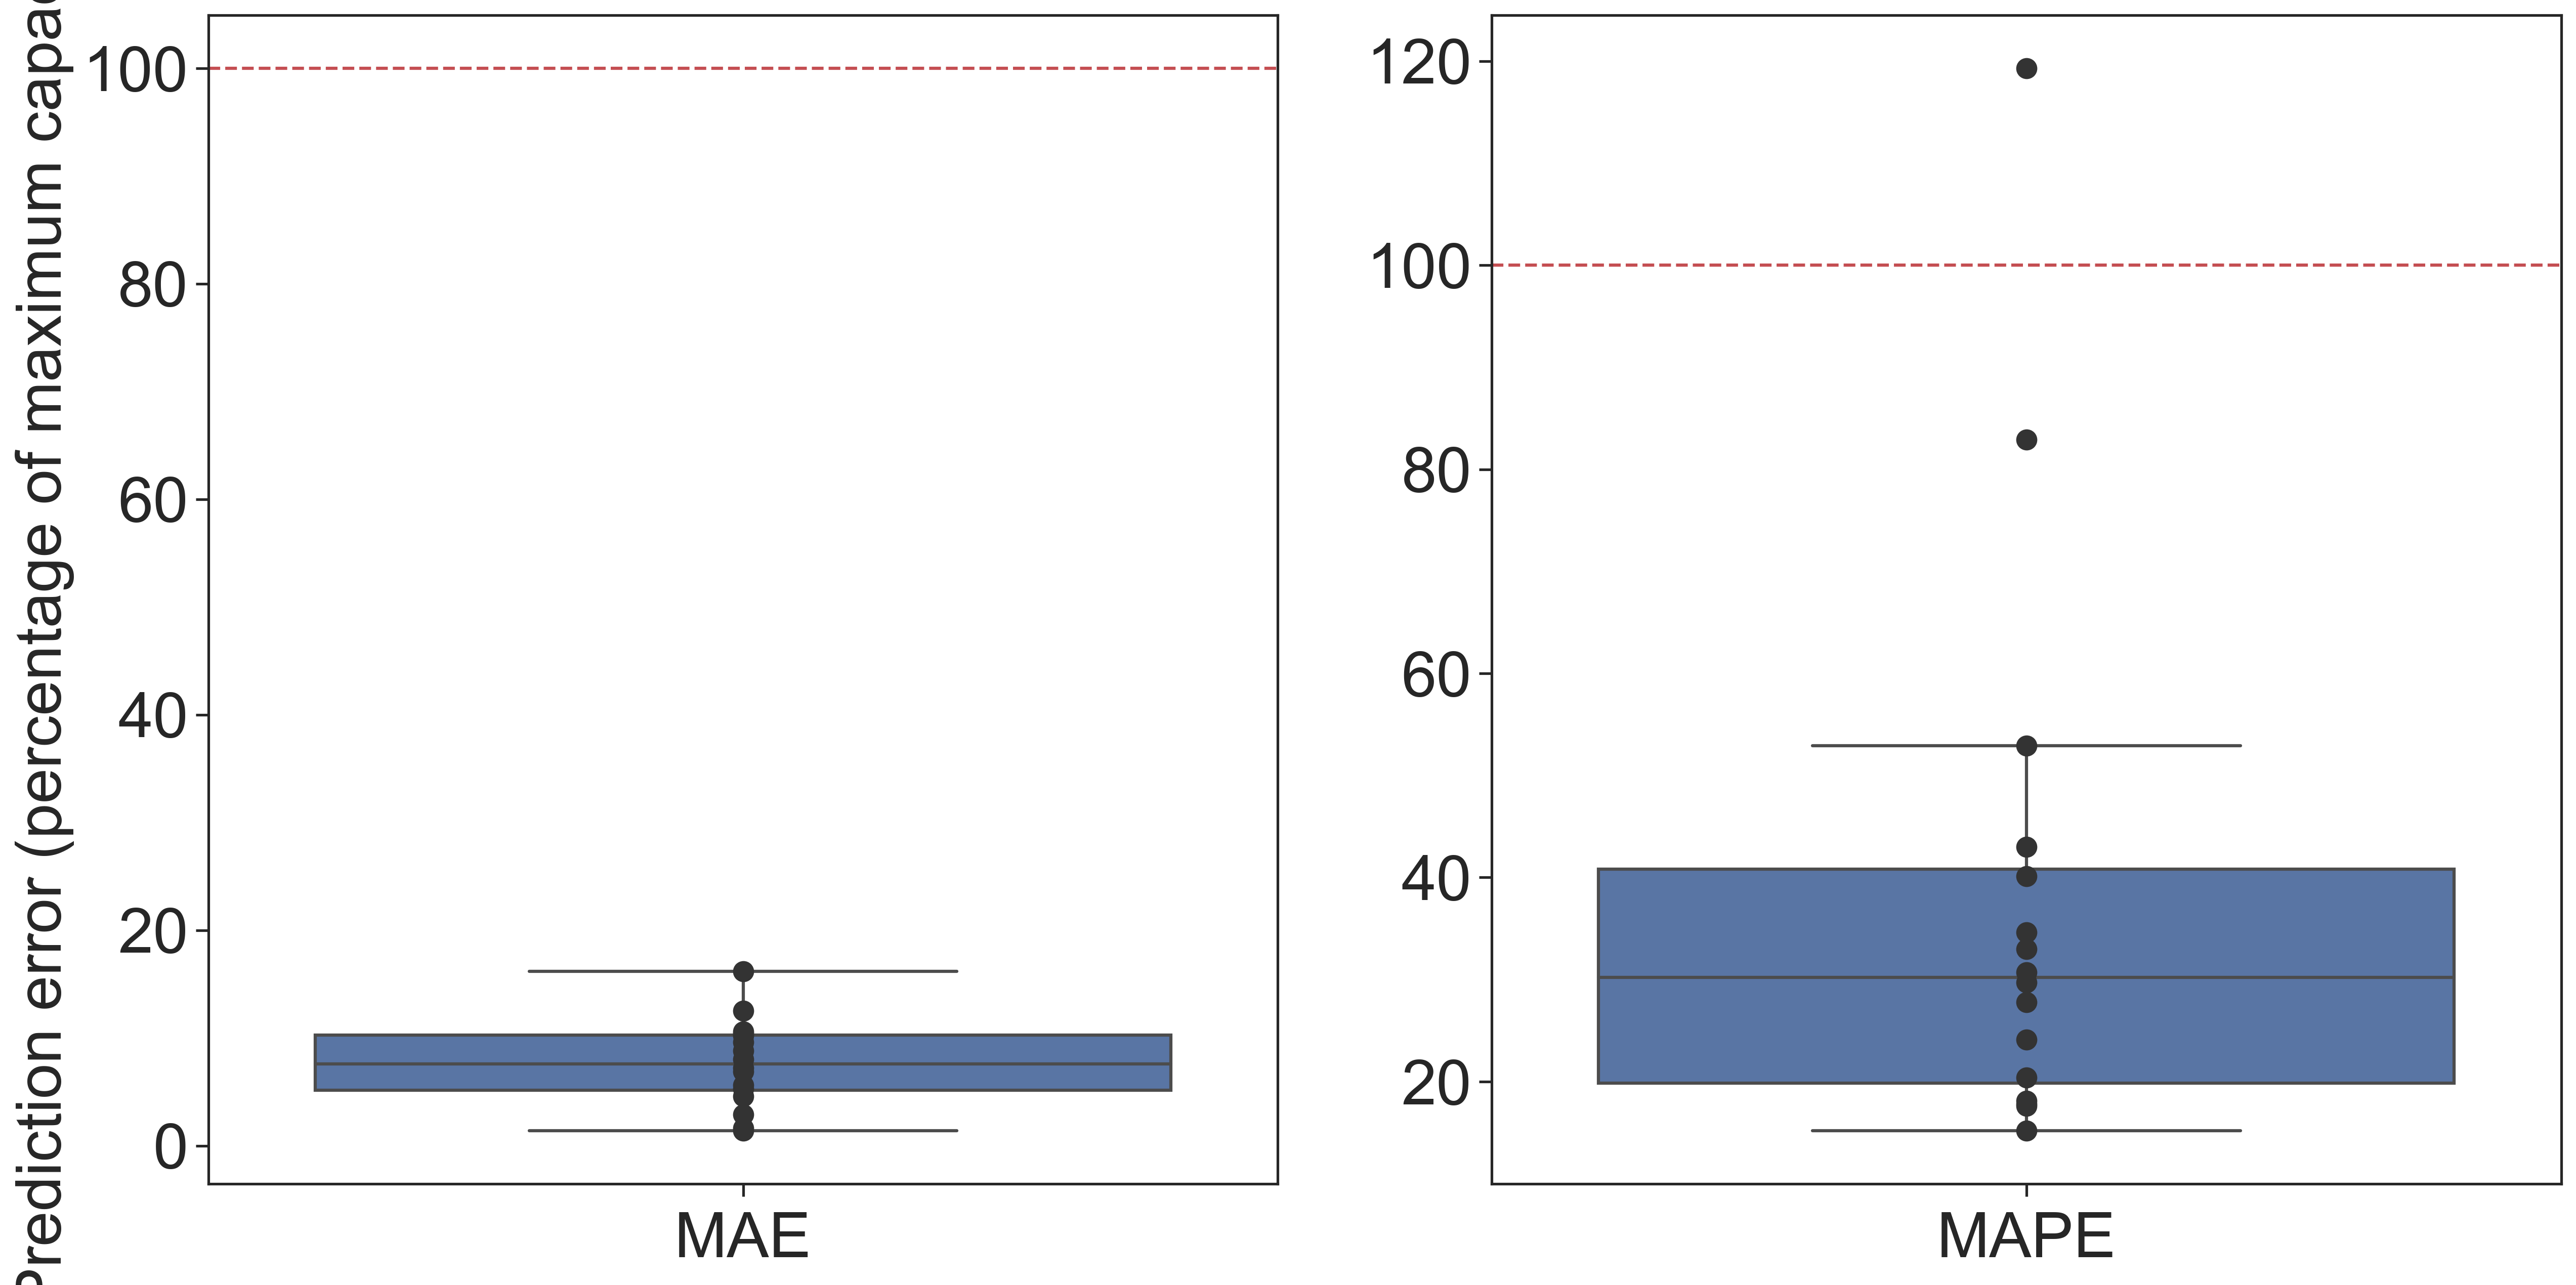

In [27]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
# x2 avec mean + x2 avec mae + mape


h = sns.boxplot(data=df_low_scenario, y='MAE',  ax=axes[0])
sns.stripplot(data=df_low_scenario, y='MAE',  ax=axes[0], s=10, color=".2", jitter=False)


axes[0].set_ylabel("Prediction error (percentage of maximum capacity)")
axes[0].axhline(y=100, linestyle='--', c='r')
axes[0].set_xlabel("MAE")

h = sns.boxplot(data=df_low_scenario, y='MAPE',  ax=axes[1])
sns.stripplot(data=df_low_scenario, y='MAPE',  ax=axes[1], s=10, color=".2", jitter=False)

axes[1].axhline(y=100, linestyle='--', c='r')
axes[1].set_xlabel("MAPE")
axes[1].set_ylabel("")

fig_path = images_path + '/error_beds_low_percent.pdf'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

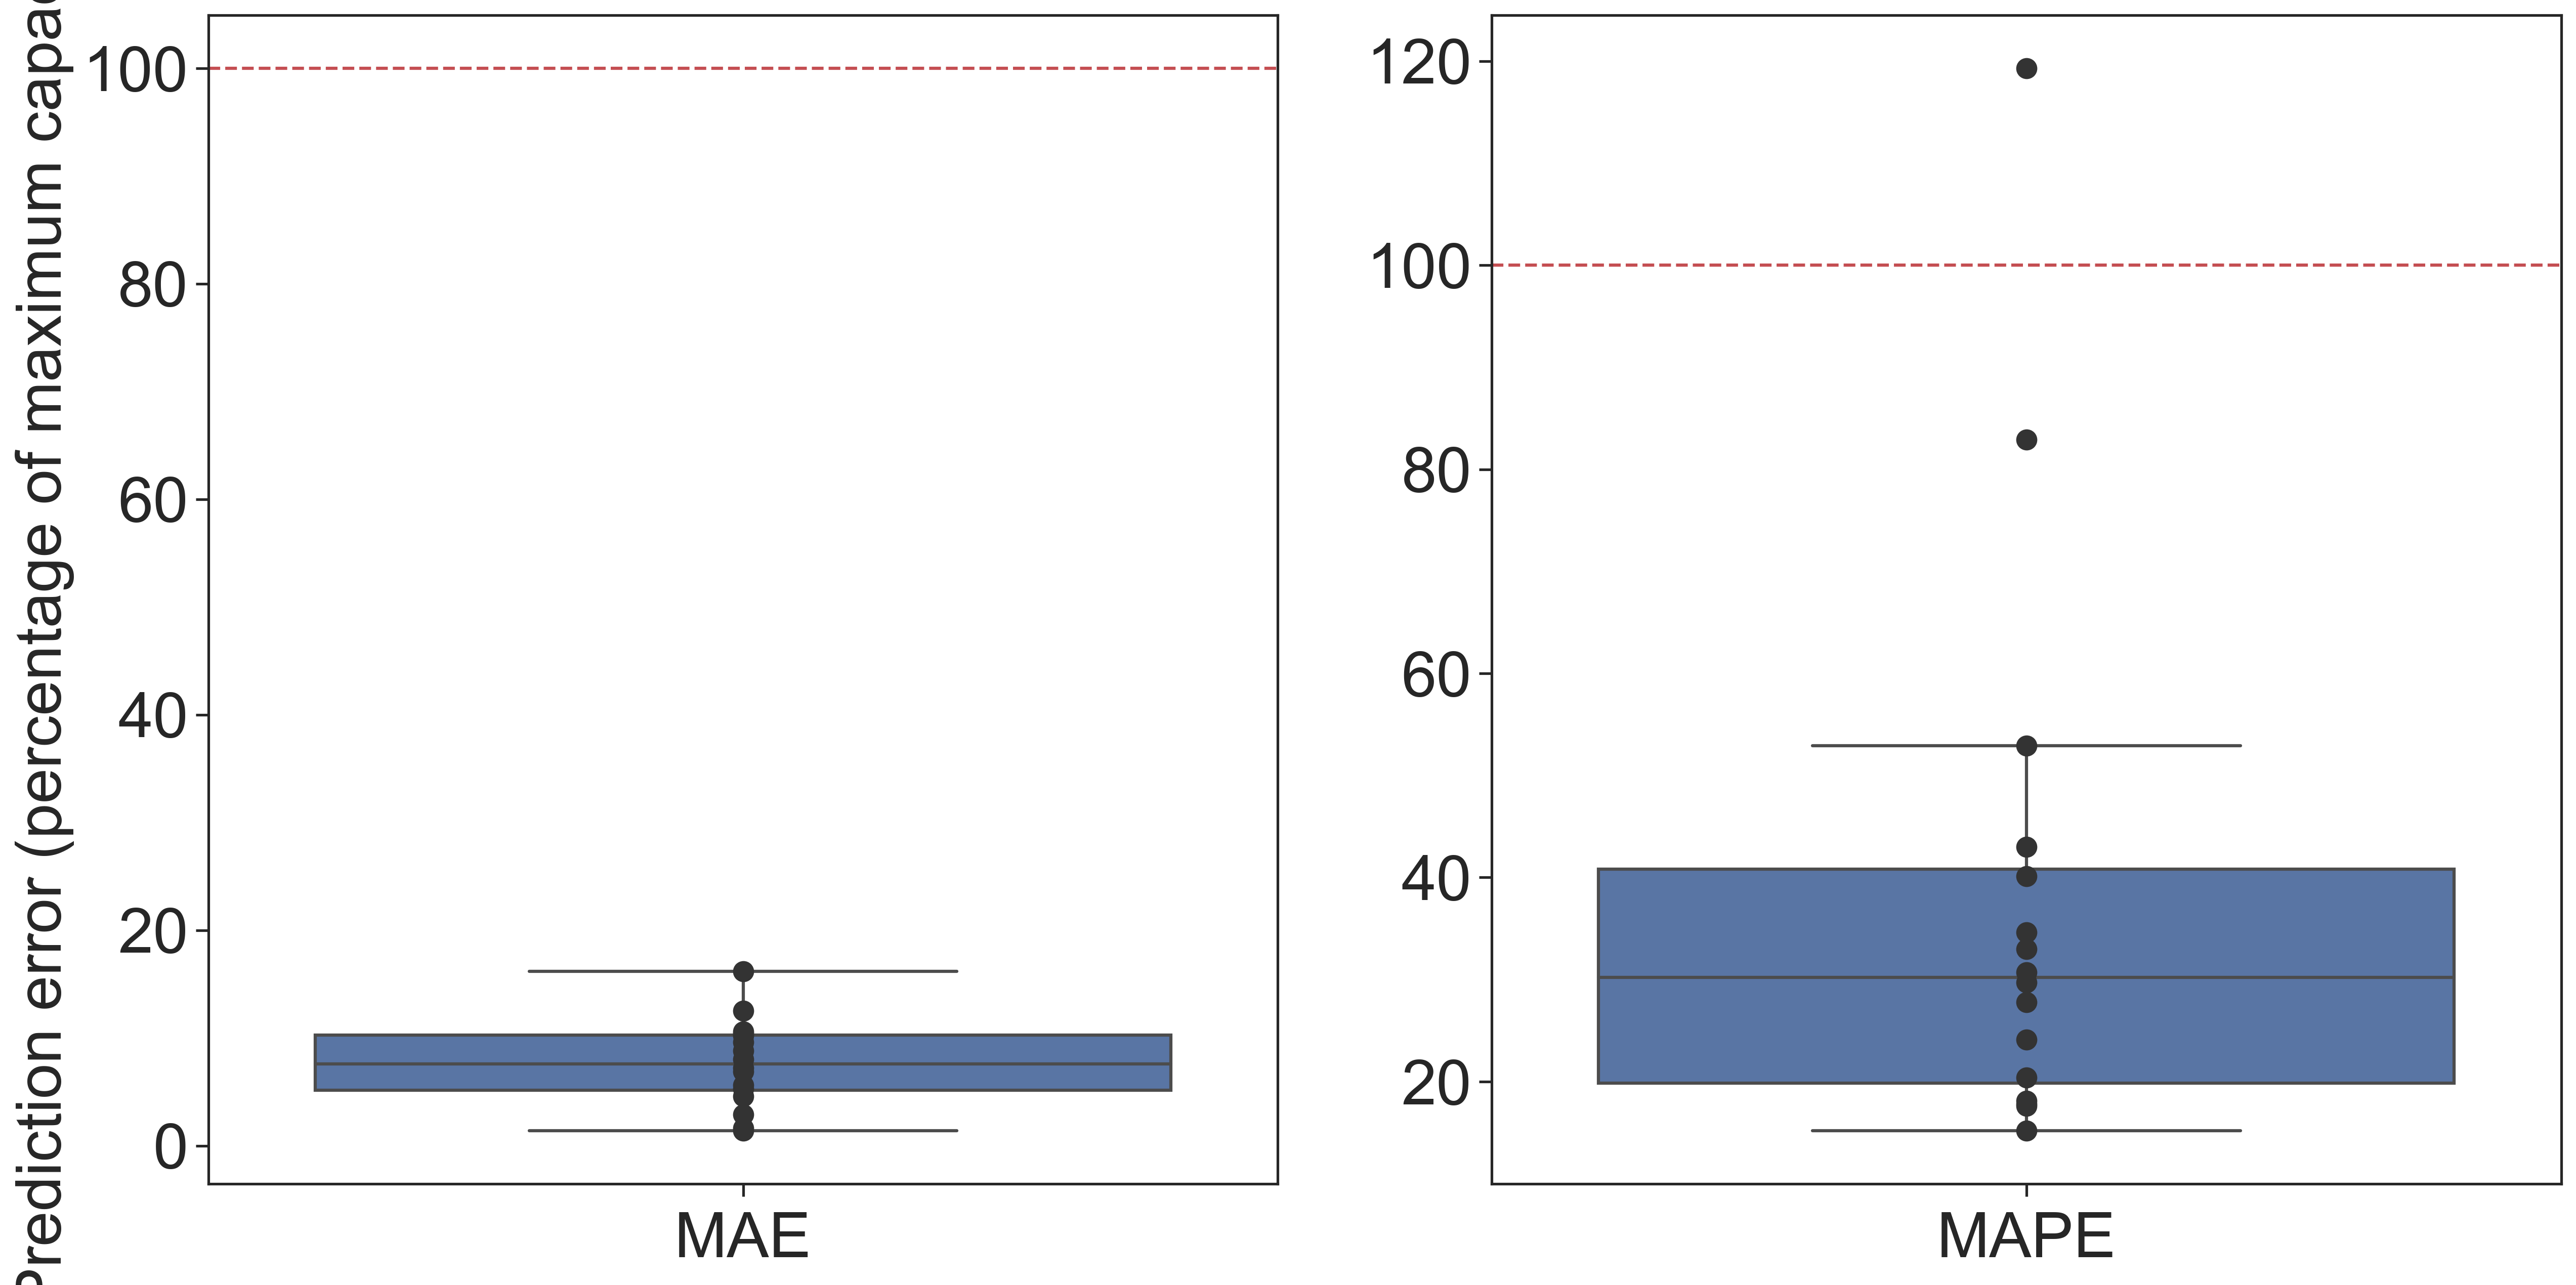

In [28]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
# x2 avec mean + x2 avec mae + mape


sns.boxplot(data=df_low_scenario, y='MAE',  ax=axes[0])
sns.stripplot(data=df_low_scenario, y='MAE',  ax=axes[0], s=10, color=".2", jitter=False)


axes[0].set_ylabel("Prediction error (percentage of maximum capacity)")
axes[0].axhline(y=100, linestyle='--', c='r')
axes[0].set_xlabel("MAE")

sns.boxplot(data=df_low_scenario, y='MAPE',  ax=axes[1])
sns.stripplot(data=df_low_scenario, y='MAPE',  ax=axes[1], s=10, color=".2", jitter=False)

axes[1].axhline(y=100, linestyle='--', c='r')
axes[1].set_xlabel("MAPE")
axes[1].set_ylabel("")

fig_path = images_path + '/error_beds_low_percent.pdf'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

In [29]:
df_median_scenario = compute_metrics_all_scenarios(data_location, metrics=metrics, normalizations=normalizations, scenario_name="med")
df_median_scenario["endpoints"] = scenario_endpoints
df_median_scenario["MAE (beds)"] = df_median_scenario["MAE"].values*np.array([endpoints_normalizations[x] for x in scenario_endpoints])
df_median_scenario["Max error (beds)"] = df_median_scenario['Max Error'].values*np.array([endpoints_normalizations[x] for x in scenario_endpoints])

with open(results_path + 'median_scenario.csv', 'w', encoding = 'utf-8-sig') as f:
    df_median_scenario.to_csv(f)
    
print(df_median_scenario.to_latex(
    formatters={"name": str.upper},
    float_format="{:.1f}".format)) 

\begin{tabular}{lrrrrlrr}
\toprule
{} &  MAE &   ME &  Max Error &  MAPE &  endpoints &  MAE (beds) &  Max error (beds) \\
\midrule
Scenario: 2020/04/28 ICU &  2.6 &  0.8 &        9.6 &  43.2 &        ICU &       182.0 &             672.0 \\
Scenario: 2020/10/30 ICU & 19.0 & 19.0 &       25.8 &  35.0 &        ICU &      1330.0 &            1806.0 \\
Scenario: 2021/01/16     & 21.8 & 20.4 &       73.0 &  72.7 &  New hosp. &       915.6 &            3066.0 \\
Scenario: 2021/02/02     & 20.0 & 20.0 &       41.8 &  67.3 &  New hosp. &       840.0 &            1755.6 \\
Scenario: 2021/02/08     & 17.6 & 17.6 &       27.0 &  59.4 &  New hosp. &       739.2 &            1134.0 \\
Scenario: 2021/02/23     &  9.8 & -9.8 &       12.4 &  31.8 &  New hosp. &       411.6 &             520.8 \\
Scenario: 2021/04/26     & 10.3 & 10.3 &       13.0 & 115.4 &  New hosp. &       432.6 &             546.0 \\
Scenario: 2021/05/21     &  1.4 & -1.1 &        2.8 &  17.9 &  New hosp. &        58.8 &          

/var/folders/nl/hpnwxlsd6xd8nq2vv1sr5pl80000gn/T/ipykernel_17630/1707219533.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_median_scenario.to_latex(


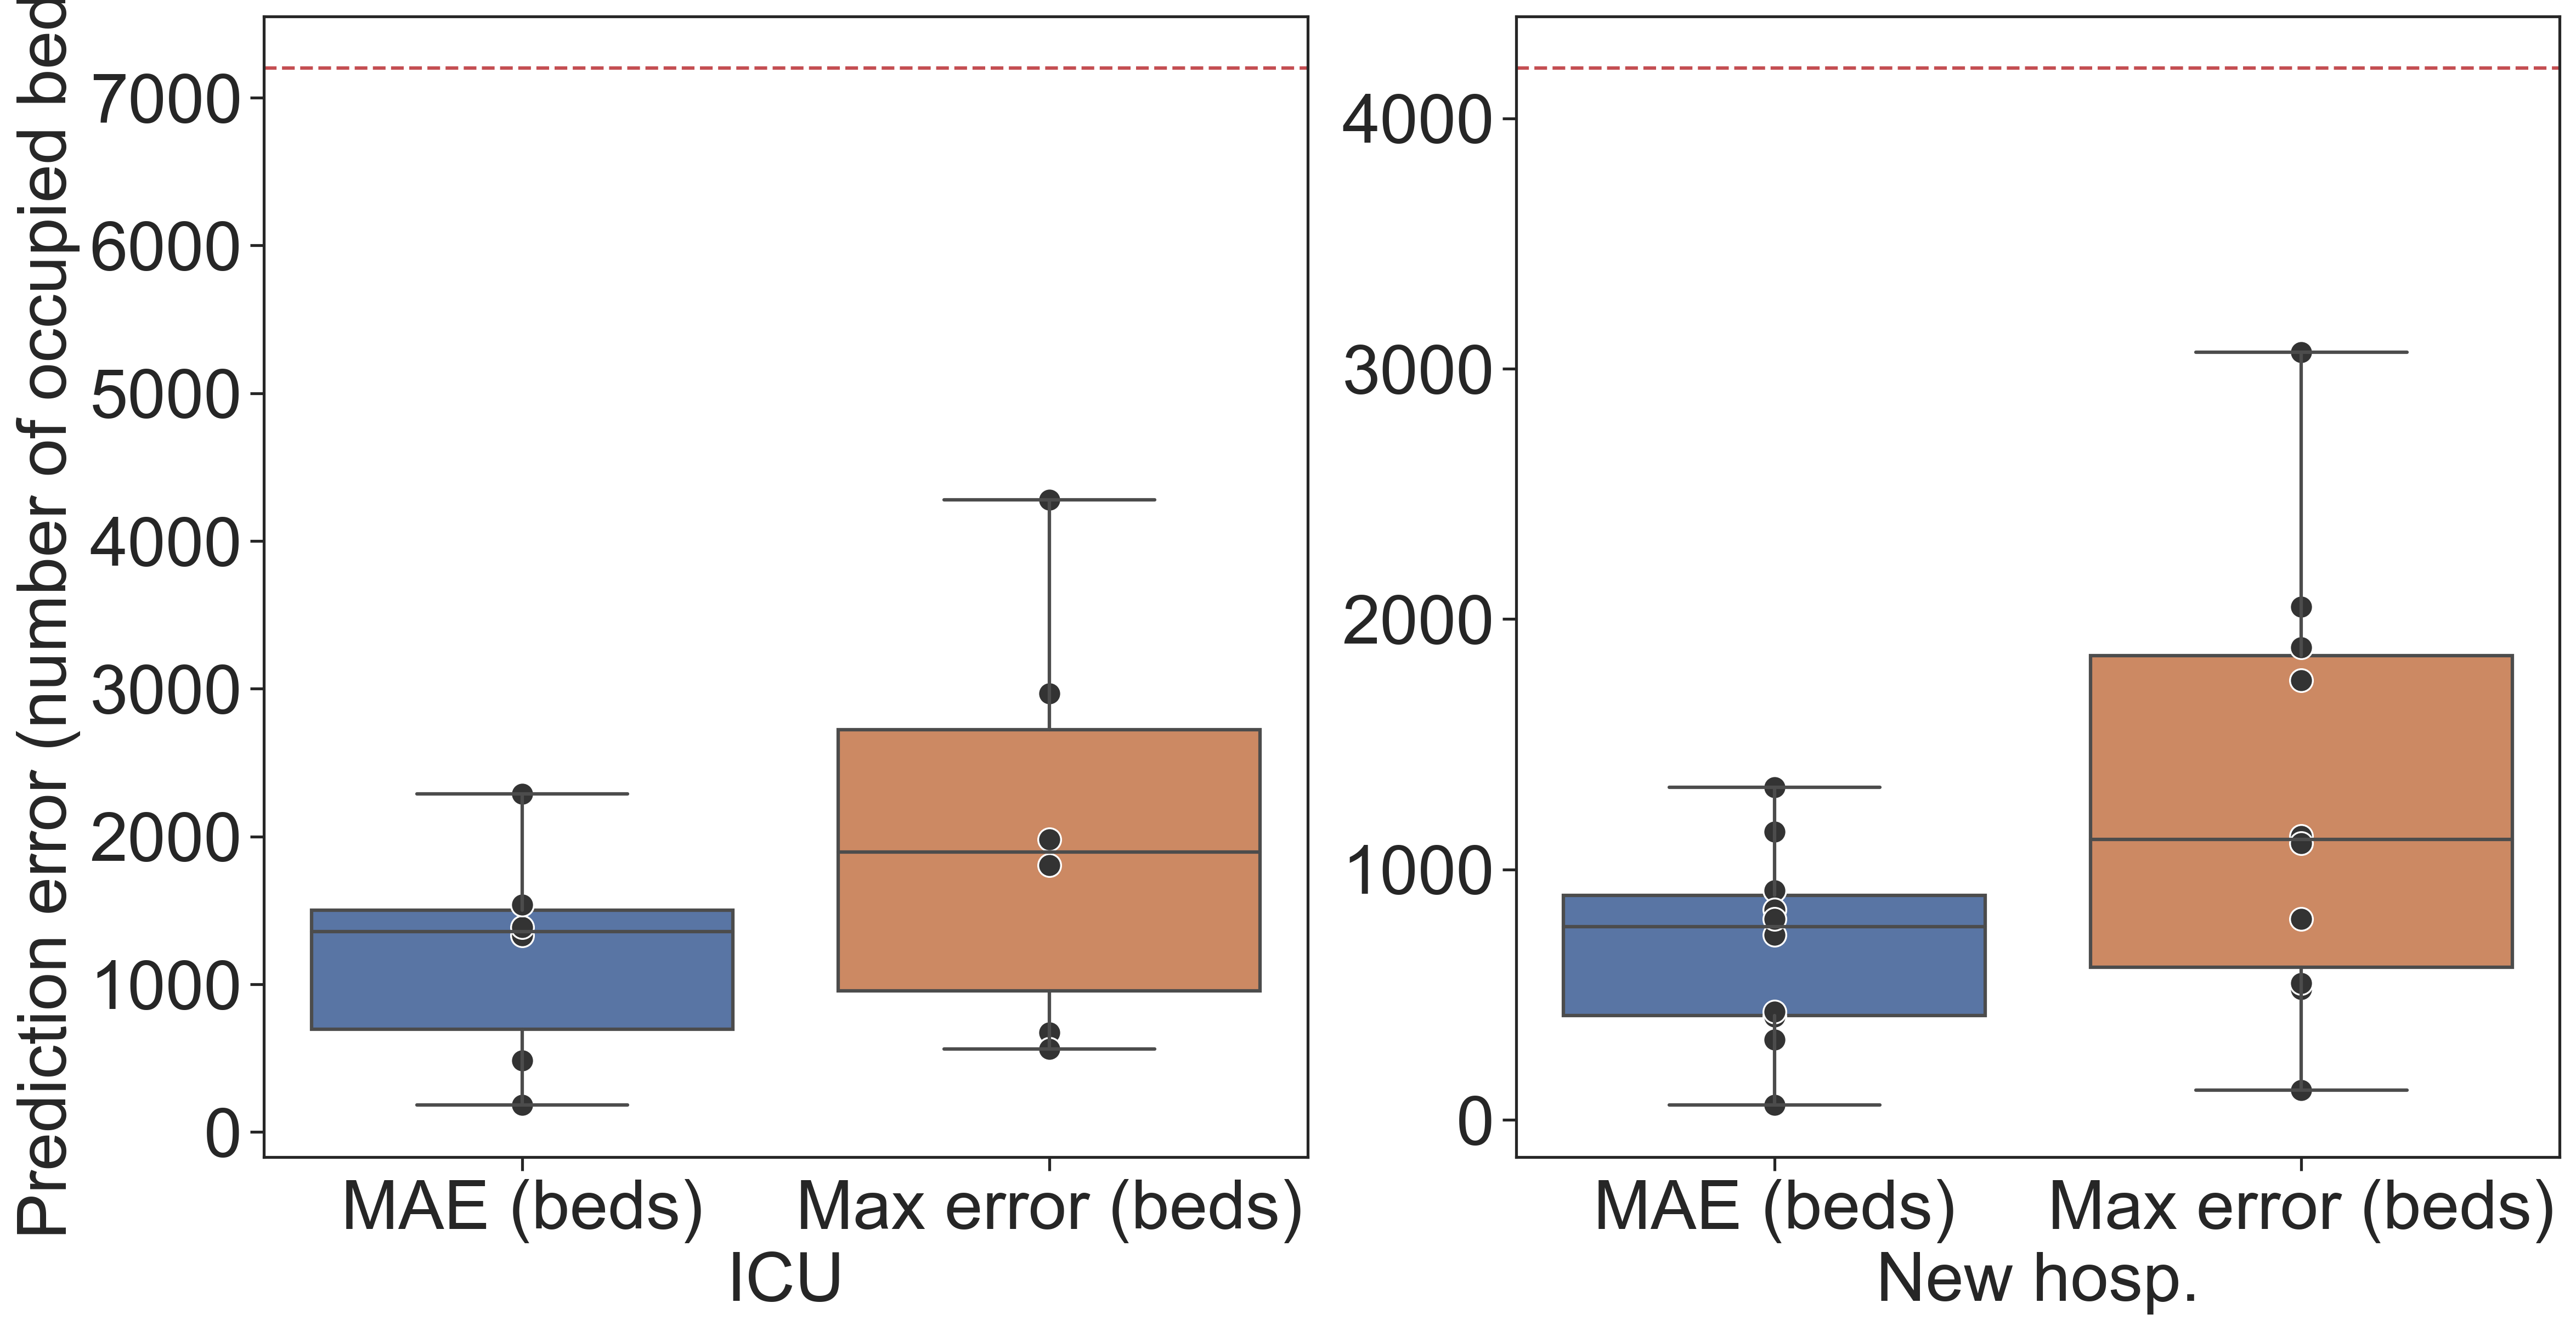

In [30]:
fig, axes = plt.subplots(figsize=(18, 9), ncols=2, nrows=1)

# x2 avec mean + x2 avec mae + mape
display_df = df_median_scenario.melt(id_vars='endpoints', value_vars=['MAE (beds)', 'Max error (beds)'])

h1 = sns.boxplot(data=display_df[display_df.endpoints=='ICU'], y='value', x='variable', ax=axes[0])
sns.scatterplot(data=display_df[display_df.endpoints=='ICU'], y='value', x='variable', ax=axes[0], s=100, color=".2")

# = sns.boxplot(data=df_median_scenario, y="Max error (beds)", ax=ax, x='endpoints')
axes[0].set_xlabel("ICU")
axes[0].set_ylabel("Prediction error (number of occupied beds)")
axes[0].axhline(7200, c='r', linestyle='--')

h2 = sns.boxplot(data=display_df[display_df.endpoints!='ICU'], y='value', x='variable', ax=axes[1])
sns.scatterplot(data=display_df[display_df.endpoints!='ICU'], y='value', x='variable', ax=axes[1], s=100, color=".2")
# = sns.boxplot(data=df_median_scenario, y="Max error (beds)", ax=ax, x='endpoints')
axes[1].set_xlabel("New hosp.")
axes[1].axhline(4200, c='r', linestyle='--')

plt.ylabel("")
    
fig_path = images_path + '/error_beds_median.pdf'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

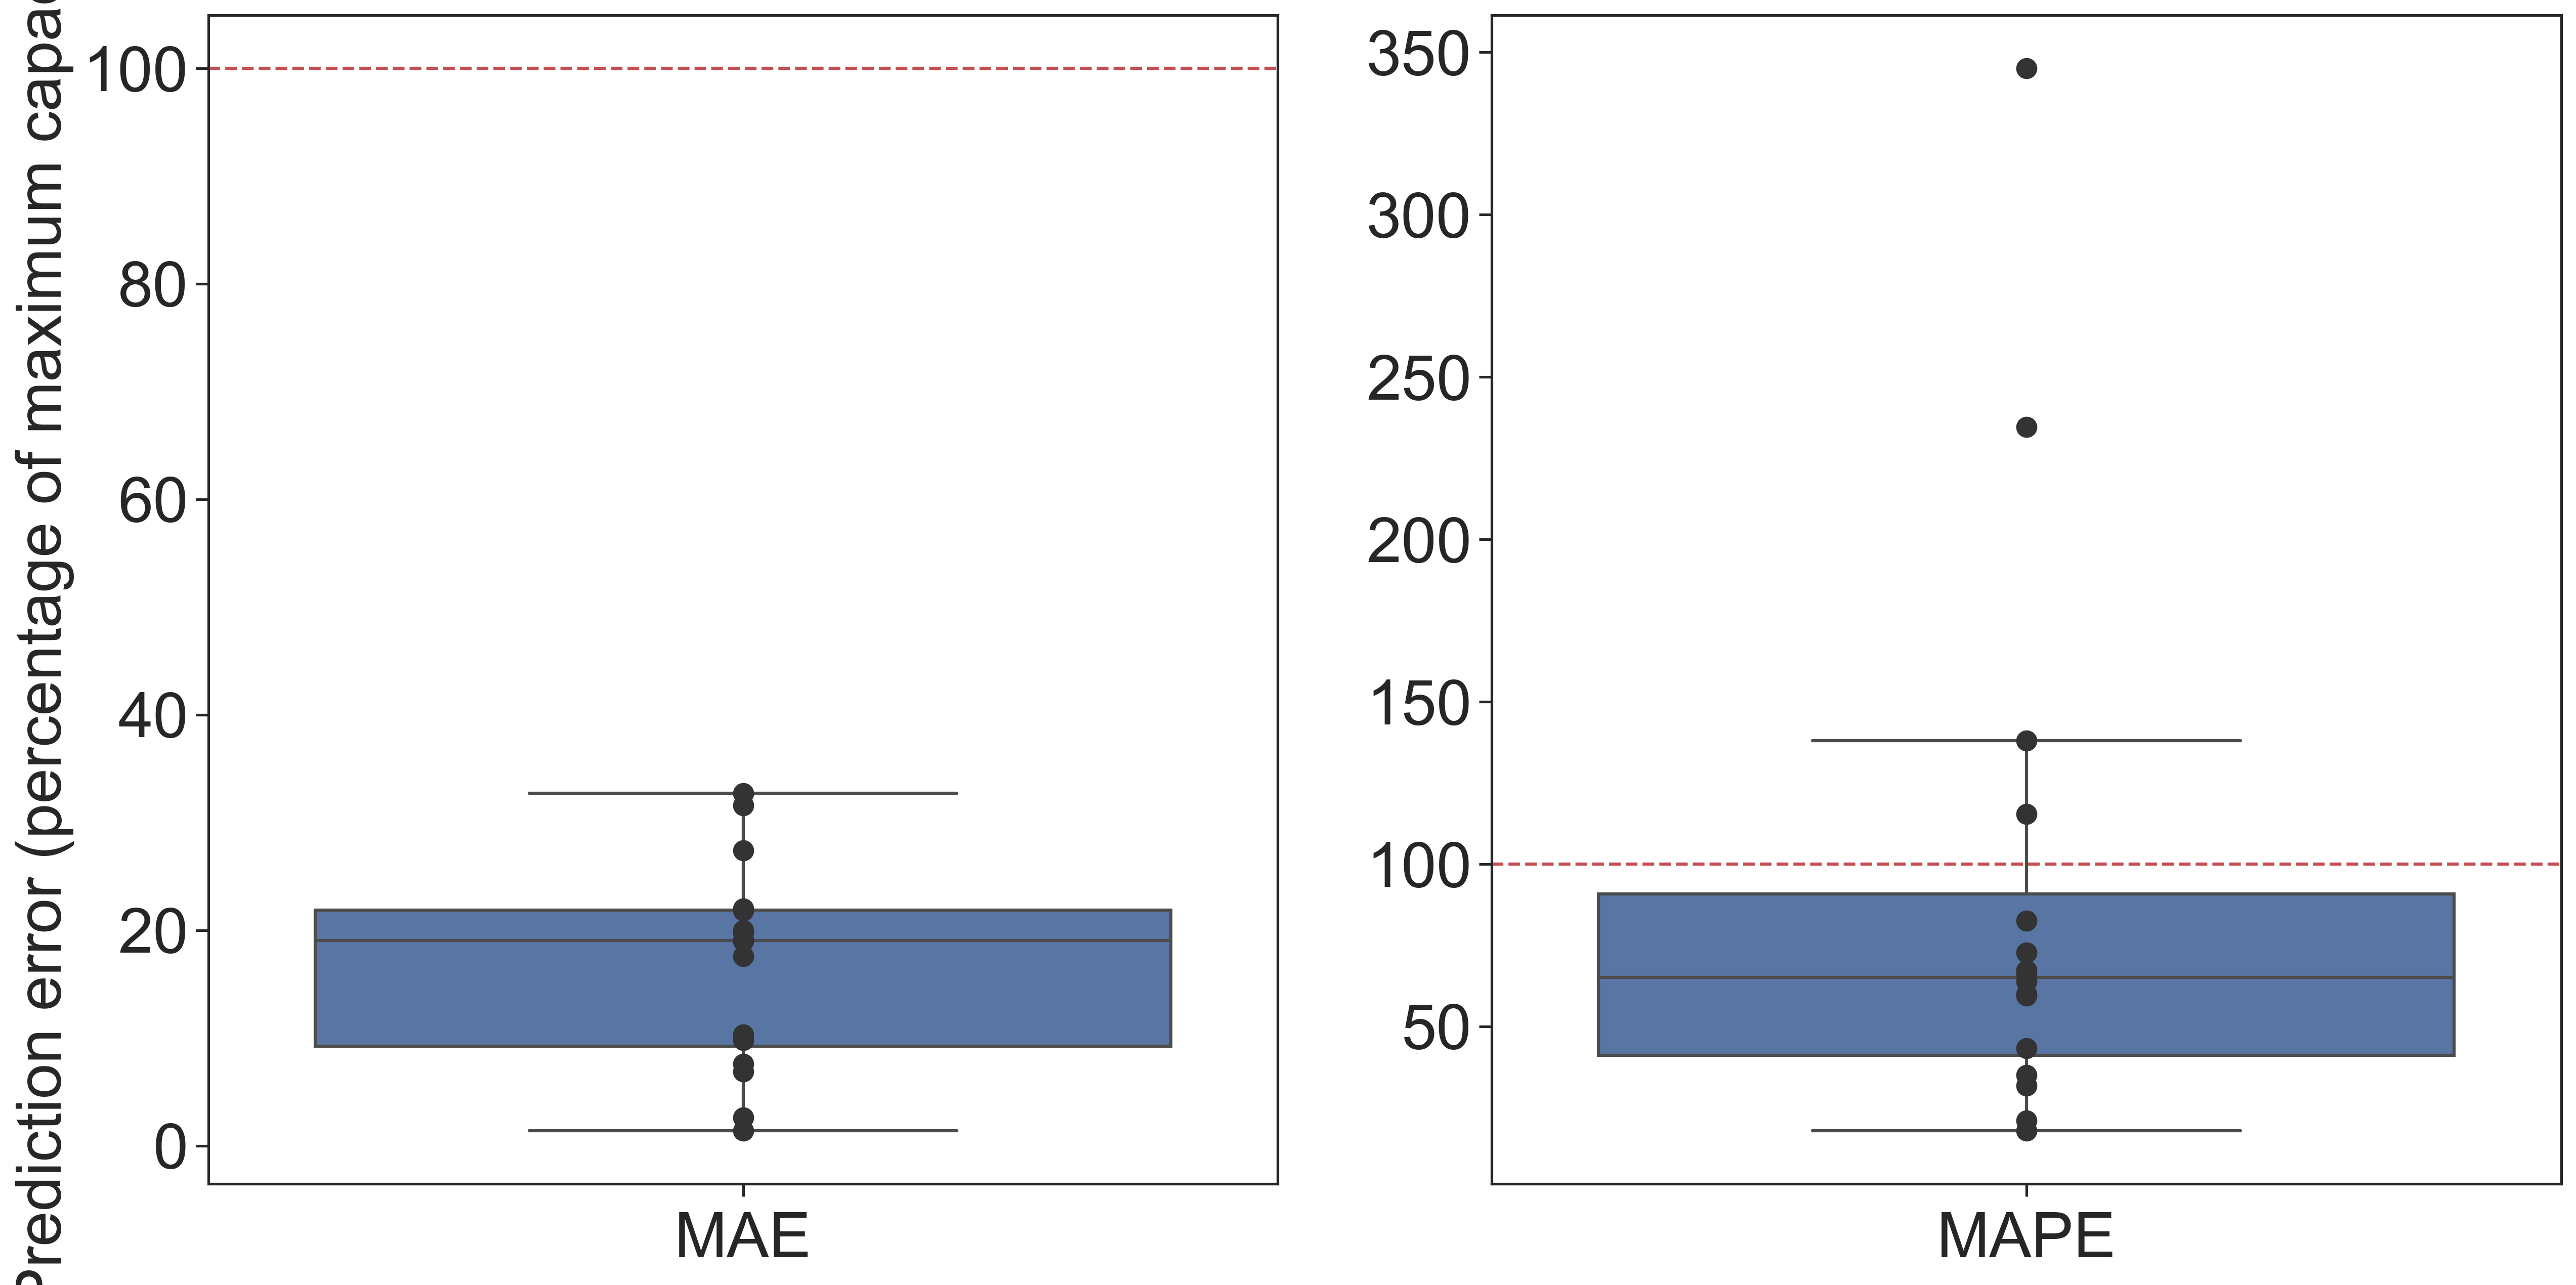

In [31]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
# x2 avec mean + x2 avec mae + mape


h = sns.boxplot(data=df_median_scenario, y='MAE',  ax=axes[0])
sns.stripplot(data=df_median_scenario, y='MAE',  ax=axes[0], s=10, color=".2", jitter=False)


axes[0].set_ylabel("Prediction error (percentage of maximum capacity)")
axes[0].axhline(y=100, linestyle='--', c='r')
axes[0].set_xlabel("MAE")

h = sns.boxplot(data=df_median_scenario, y='MAPE',  ax=axes[1])
sns.stripplot(data=df_median_scenario, y='MAPE',  ax=axes[1], s=10, color=".2", jitter=False)

axes[1].axhline(y=100, linestyle='--', c='r')
axes[1].set_xlabel("MAPE")
axes[1].set_ylabel("")

fig_path = images_path + '/error_beds_median_percent.pdf'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

In [32]:
df_high_scenario = compute_metrics_all_scenarios(data_location, metrics=metrics, normalizations=normalizations, scenario_name="max")
df_high_scenario["endpoints"] = scenario_endpoints
df_high_scenario["MAE (beds)"] = df_high_scenario["MAE"].values*np.array([endpoints_normalizations[x] for x in scenario_endpoints])
df_high_scenario["Max error (beds)"] = df_high_scenario['Max Error'].values*np.array([endpoints_normalizations[x] for x in scenario_endpoints])

with open(results_path + 'high_scenario.csv', 'w', encoding = 'utf-8-sig') as f:
    df_high_scenario.to_csv(f)

print(df_high_scenario.to_latex(
    formatters={"name": str.upper},
    float_format="{:.1f}".format)) 

\begin{tabular}{lrrrrlrr}
\toprule
{} &  MAE &   ME &  Max Error &  MAPE &  endpoints &  MAE (beds) &  Max error (beds) \\
\midrule
Scenario: 2020/04/28 ICU &  8.6 &  6.8 &       35.1 & 166.9 &        ICU &       602.0 &            2457.0 \\
Scenario: 2020/10/30 ICU & 48.5 & 48.5 &       83.5 &  96.5 &        ICU &      3395.0 &            5845.0 \\
Scenario: 2021/01/16     & 42.1 & 41.9 &       90.9 & 144.0 &  New hosp. &      1768.2 &            3817.8 \\
Scenario: 2021/02/02     & 34.2 & 34.2 &       67.0 & 115.2 &  New hosp. &      1436.4 &            2814.0 \\
Scenario: 2021/02/08     & 29.1 & 29.1 &       46.6 &  99.8 &  New hosp. &      1222.2 &            1957.2 \\
Scenario: 2021/02/23     &  7.0 &  2.9 &       22.0 &  21.5 &  New hosp. &       294.0 &             924.0 \\
Scenario: 2021/04/26     & 16.9 & 16.9 &       27.9 & 206.0 &  New hosp. &       709.8 &            1171.8 \\
Scenario: 2021/05/21     &  2.3 &  0.7 &        5.3 &  40.1 &  New hosp. &        96.6 &          

/var/folders/nl/hpnwxlsd6xd8nq2vv1sr5pl80000gn/T/ipykernel_17630/2726003453.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_high_scenario.to_latex(


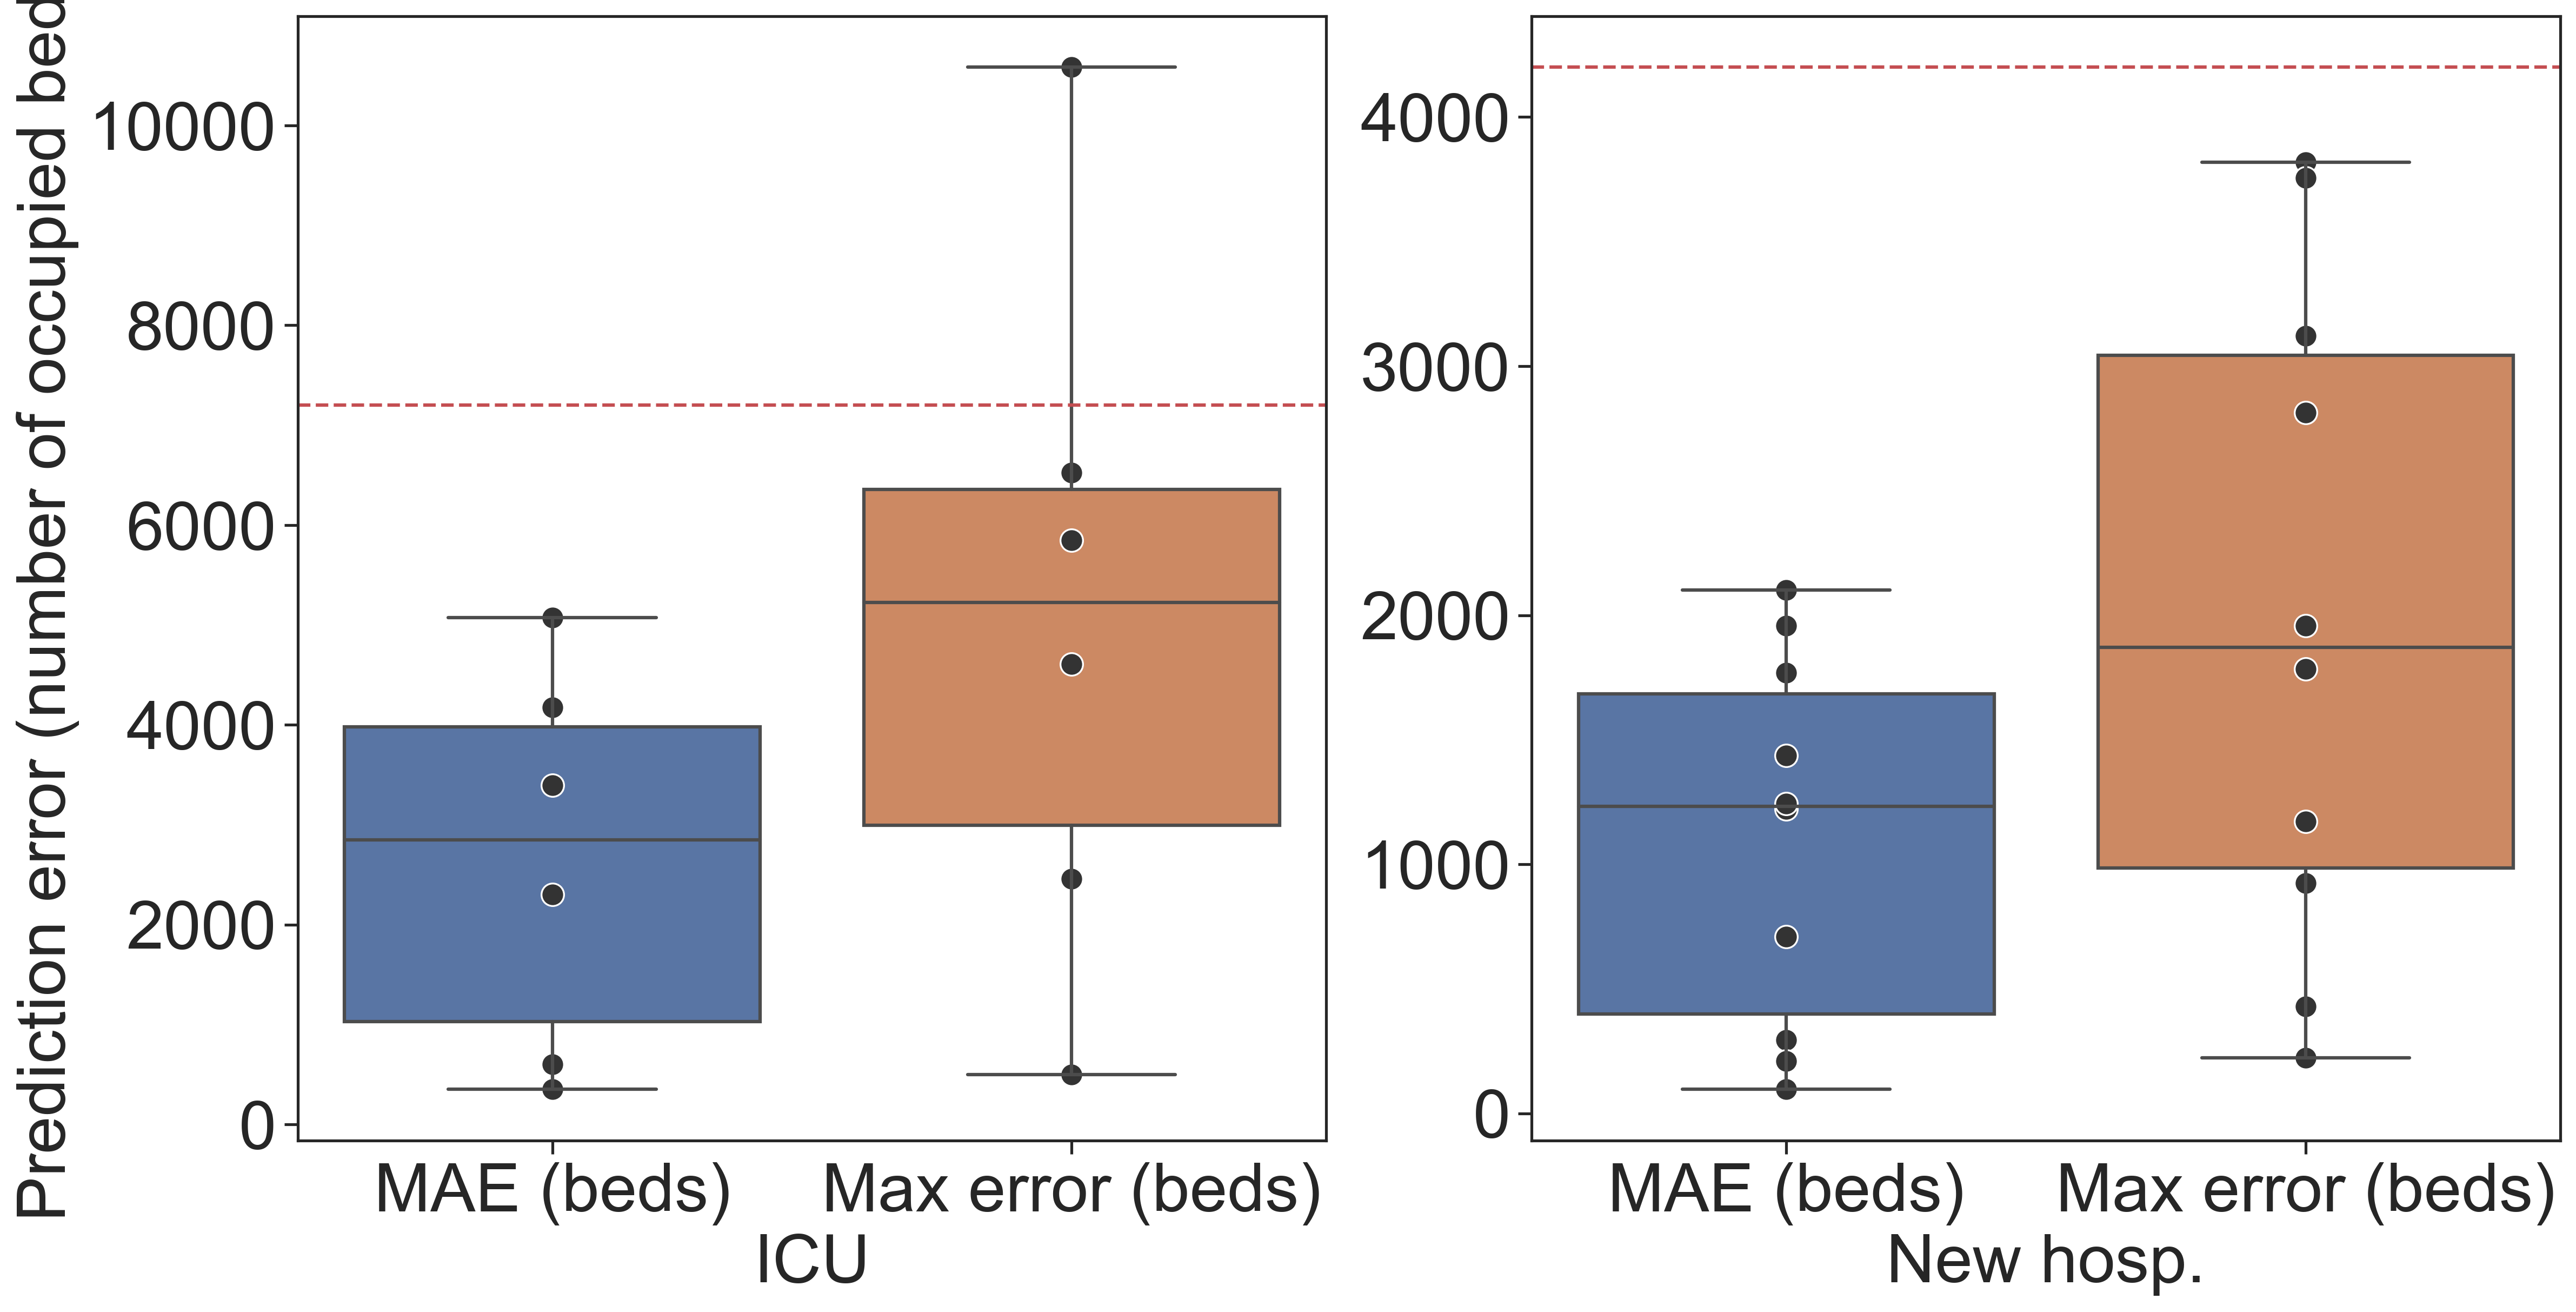

In [33]:
fig, axes = plt.subplots(figsize=(18, 9), ncols=2, nrows=1)

# x2 avec mean + x2 avec mae + mape
display_df = df_high_scenario.melt(id_vars='endpoints', value_vars=['MAE (beds)', 'Max error (beds)'])

h1 = sns.boxplot(data=display_df[display_df.endpoints=='ICU'], y='value', x='variable', ax=axes[0])
sns.scatterplot(data=display_df[display_df.endpoints=='ICU'], y='value', x='variable', ax=axes[0], s=100, color=".2")

# = sns.boxplot(data=df_median_scenario, y="Max error (beds)", ax=ax, x='endpoints')
axes[0].set_xlabel("ICU")
axes[0].set_ylabel("Prediction error (number of occupied beds)")
axes[0].axhline(7200, c='r', linestyle='--')

h2 = sns.boxplot(data=display_df[display_df.endpoints!='ICU'], y='value', x='variable', ax=axes[1])
sns.scatterplot(data=display_df[display_df.endpoints!='ICU'], y='value', x='variable', ax=axes[1], s=100, color=".2")
# = sns.boxplot(data=df_median_scenario, y="Max error (beds)", ax=ax, x='endpoints')
axes[1].set_xlabel("New hosp.")
axes[1].axhline(4200, c='r', linestyle='--')

plt.ylabel("")
    
fig_path = images_path + '/error_beds_high.pdf'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

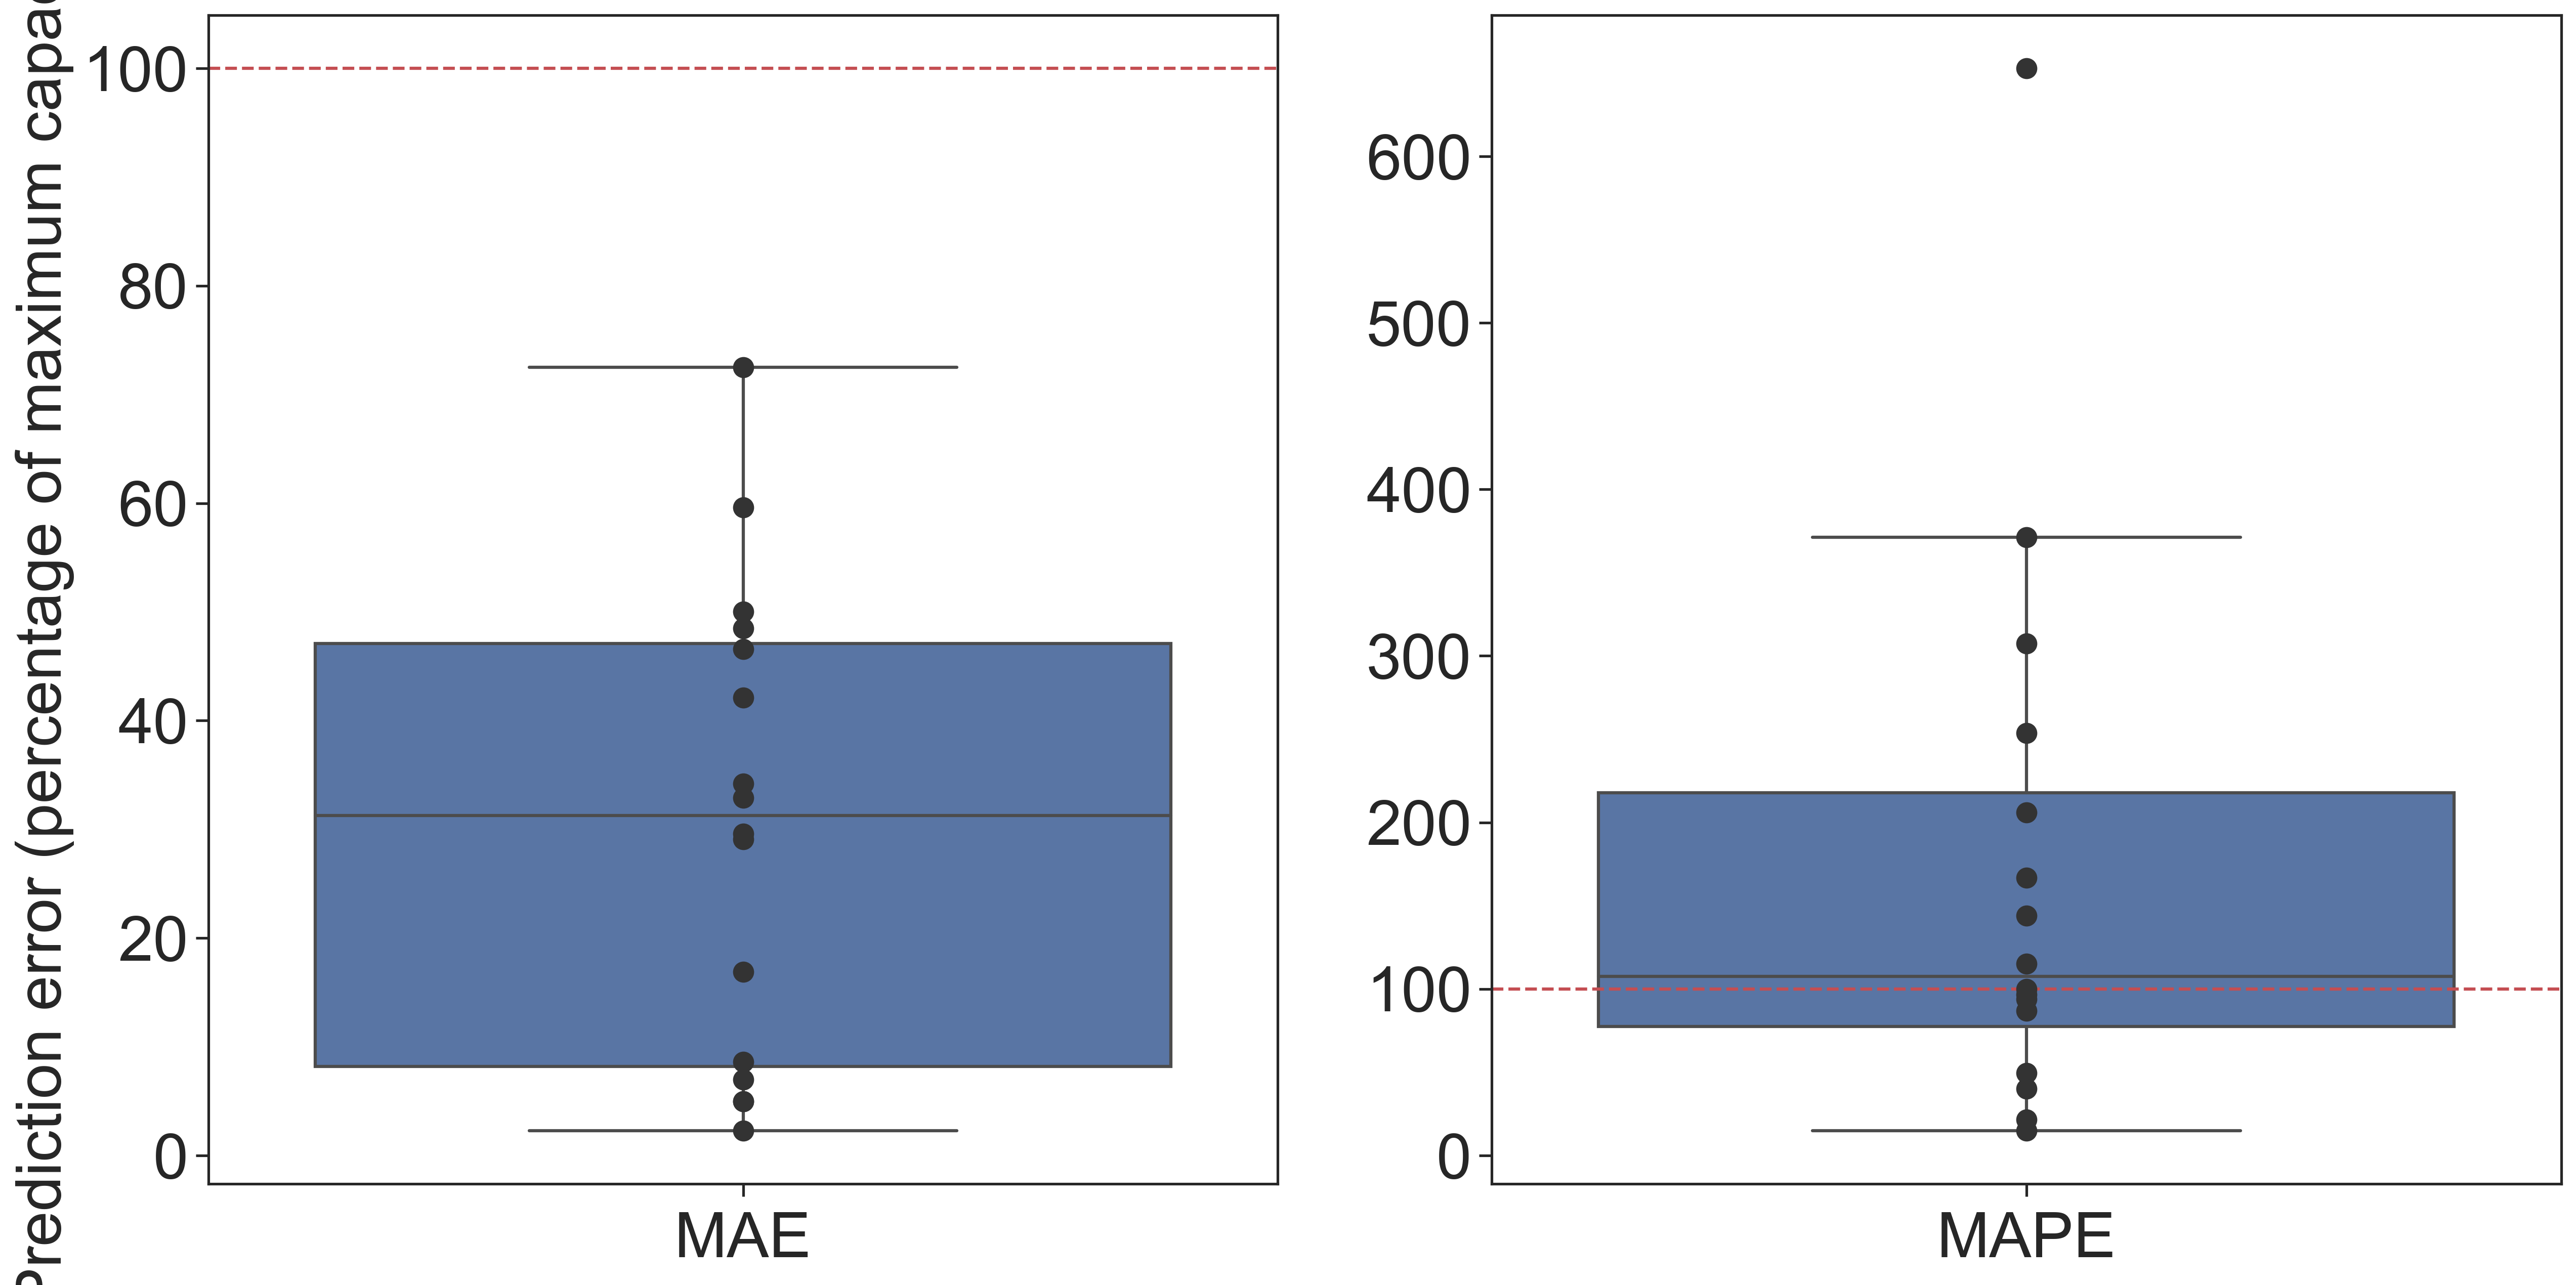

In [34]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
# x2 avec mean + x2 avec mae + mape


h = sns.boxplot(data=df_high_scenario, y='MAE',  ax=axes[0])
sns.stripplot(data=df_high_scenario, y='MAE',  ax=axes[0], s=10, color=".2", jitter=False)


axes[0].set_ylabel("Prediction error (percentage of maximum capacity)")
axes[0].axhline(y=100, linestyle='--', c='r')
axes[0].set_xlabel("MAE")

h = sns.boxplot(data=df_high_scenario, y='MAPE',  ax=axes[1])

sns.stripplot(data=df_high_scenario, y='MAPE',  ax=axes[1], s=10, color=".2", jitter=False)

axes[1].axhline(y=100, linestyle='--', c='r')
axes[1].set_xlabel("MAPE")
axes[1].set_ylabel("")

fig_path = images_path + '/error_beds_high_percent.pdf'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

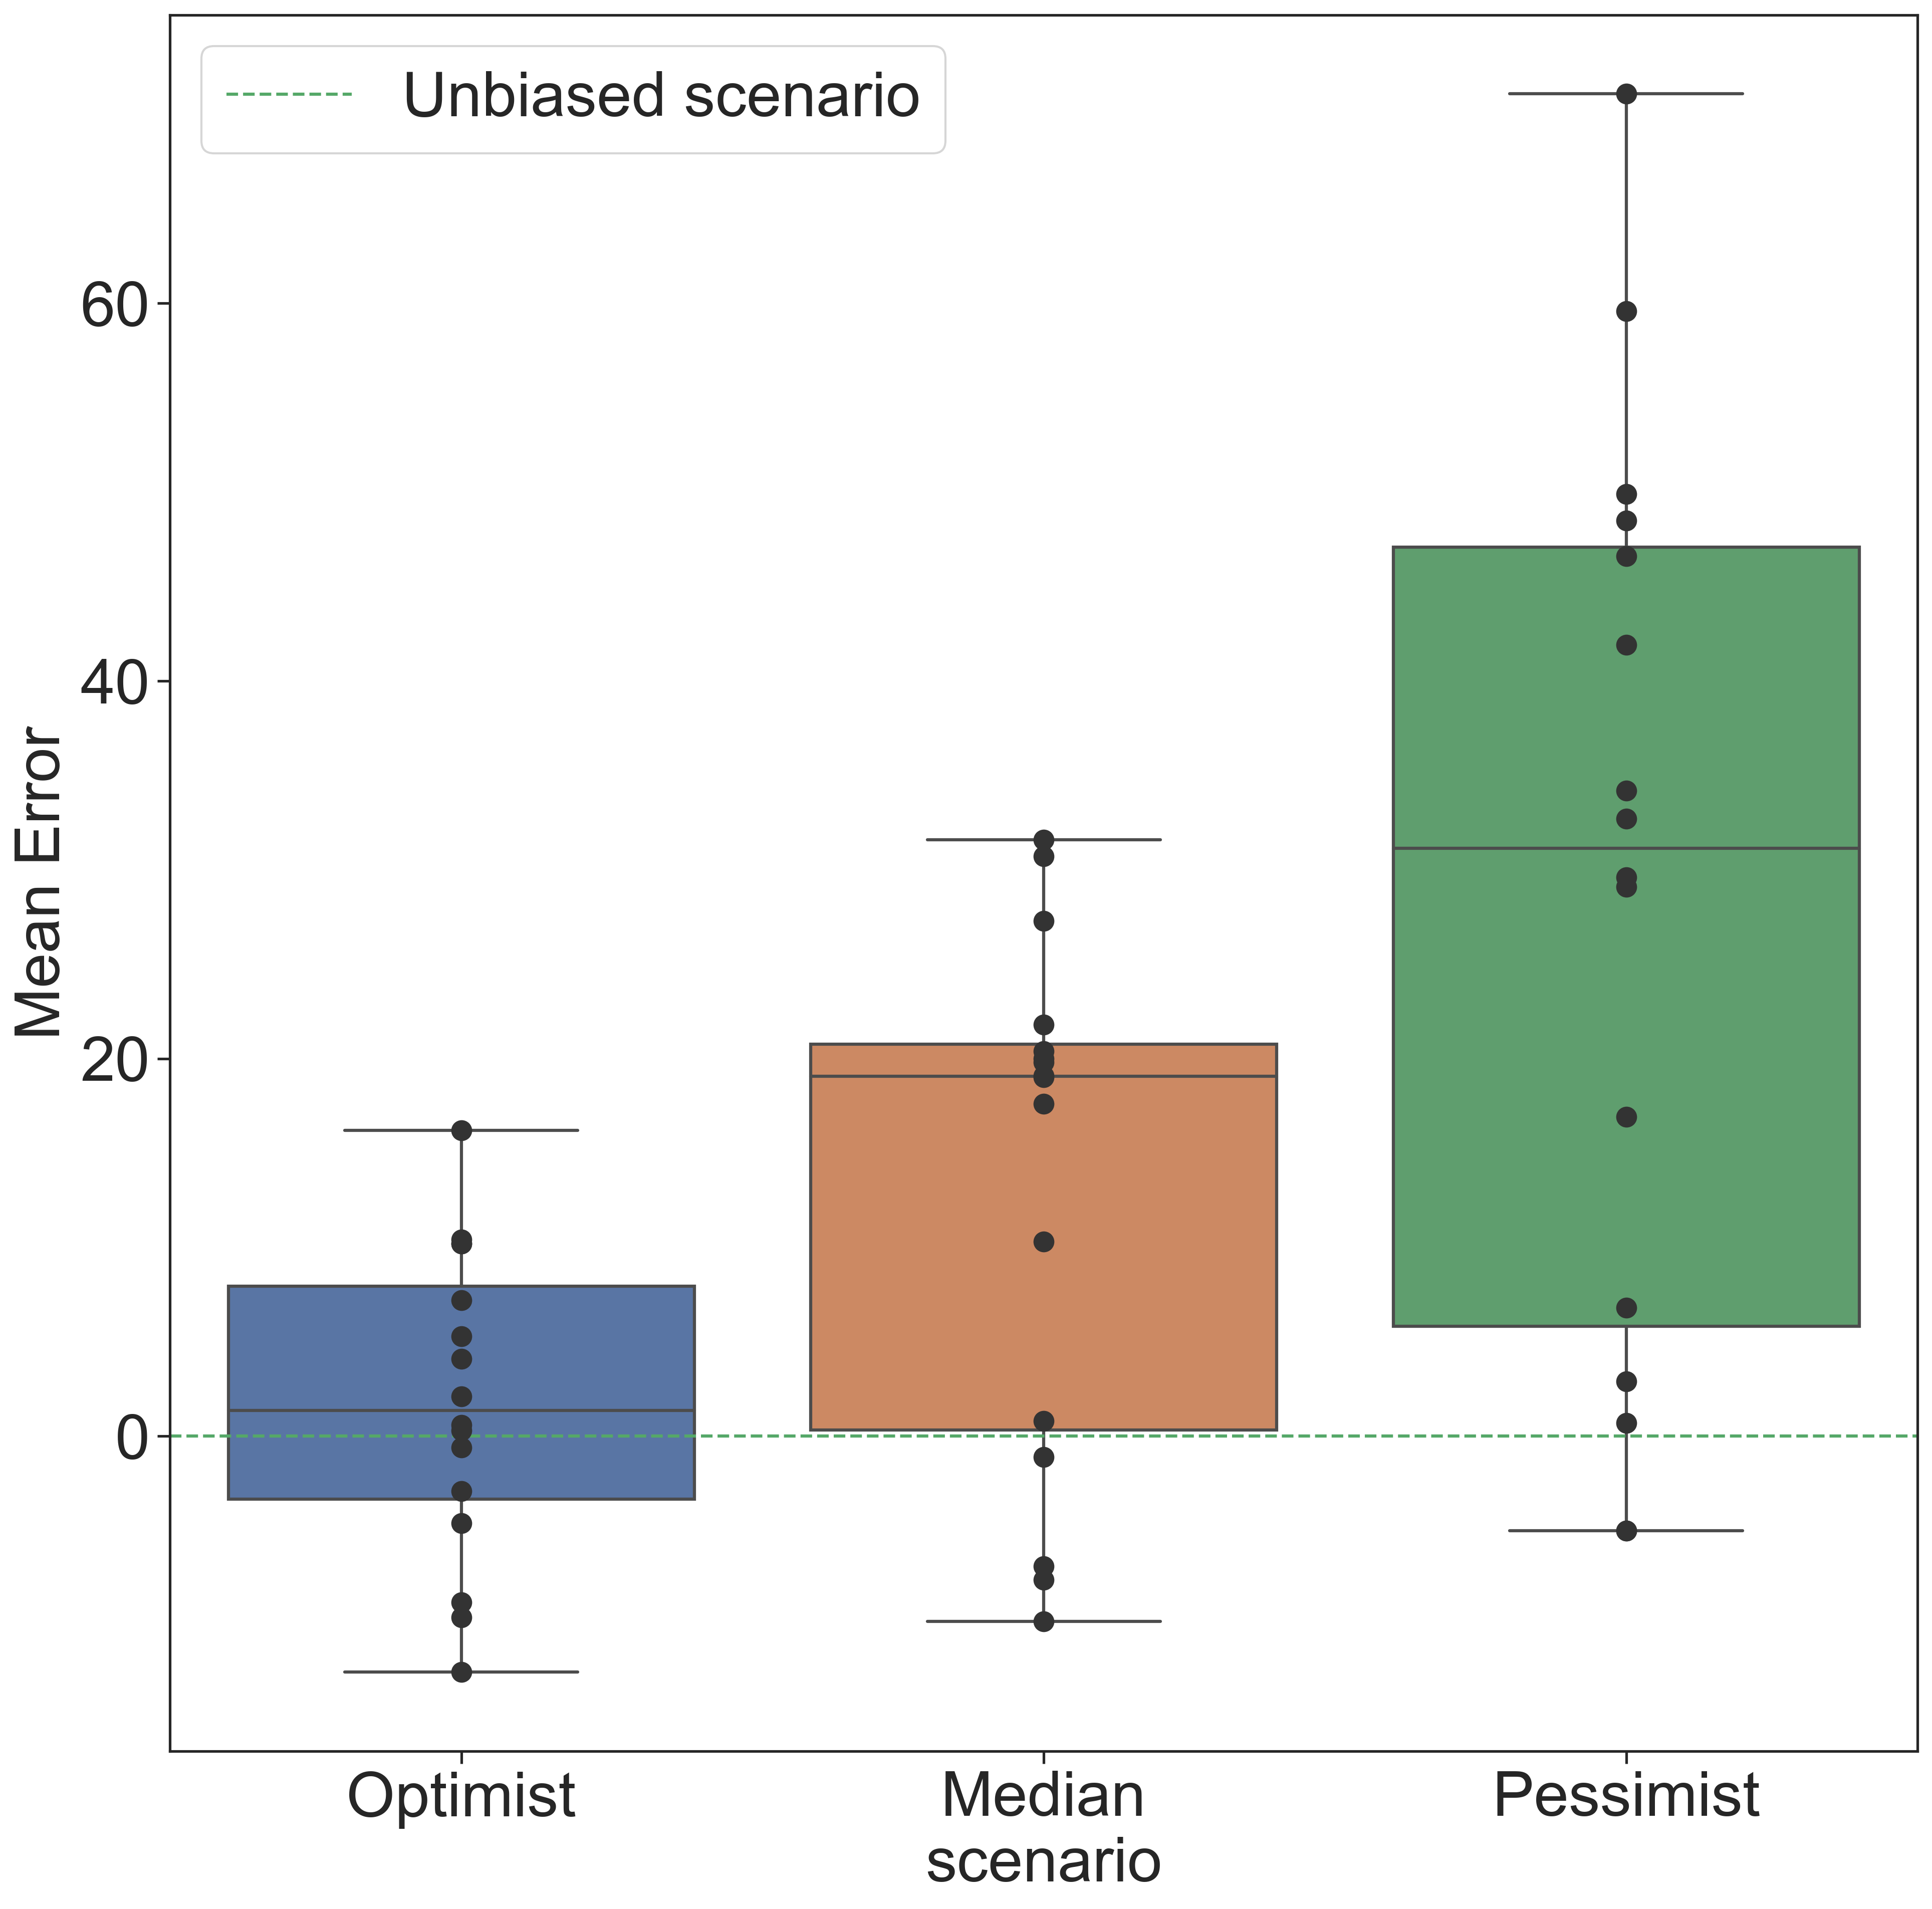

In [35]:
display_df = pd.concat([df_low_scenario.assign(scenario='Optimist'), df_median_scenario.assign(scenario='Median'),
                        df_high_scenario.assign(scenario='Pessimist')], axis=0)
with open(results_path + 'mean_error.csv', 'w', encoding = 'utf-8-sig') as f:
    display_df.to_csv(f)
fig, ax = plt.subplots(figsize=(15, 15))
h = sns.boxplot(data=display_df, y="ME", x="scenario", ax=ax)
sns.stripplot(data=display_df, y="ME", x="scenario", ax=ax, s=10, color=".2", jitter=False)

ax.axhline(y=0, linestyle='--', c='g', label = 'Unbiased scenario')
ax.set_ylabel("Mean Error")
plt.legend()
fig_path = images_path + '/mean_error_scenario_type.pdf'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
